In [1]:
import matplotlib.pyplot as plt
import numpy as np
import Geodesics as gd
import Model as md
import cmath as cmt
import glob
import os
import time
from scipy.optimize import curve_fit as cf

In [3]:
## Generating Fractons
def distinctVerticesGeods(model):
    '''
    Function that generates a list of distinct vertices on a hyperbolic lattice.
    Inputs:
        model: md.FractonModel object
    Outputs:
        vertex_list: List of vertices positions in the poincare disk
    '''
    vertex_list = []
    for pol in model.bulk:
        vertices = model.lattice.get_vertices(pol)
        for v in vertices:
            add = True
            for v0 in vertex_list:
                if cmt.isclose(v,v0):
                    add = False
            if add:
                vertex_list.append(v)
    return vertex_list

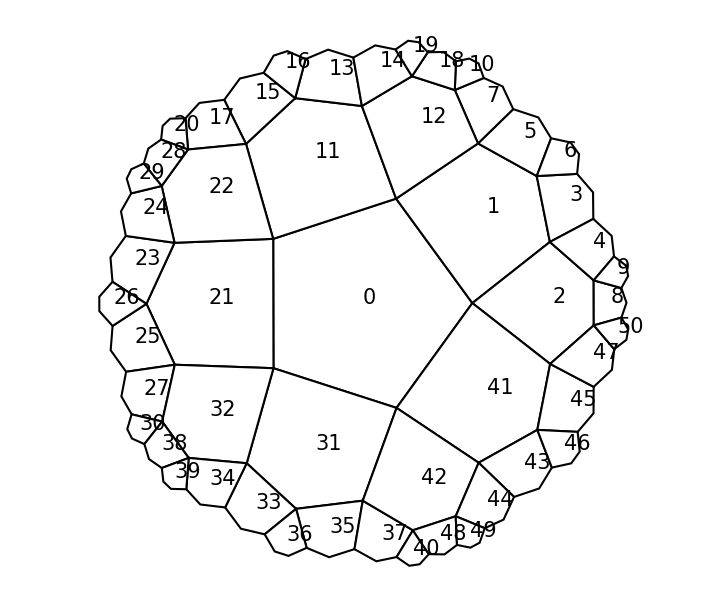

In [69]:
modl = md.FractonModel(5,4,3)
vert = distinctVerticesGeods(modl)
fig, ax = modl.quick_plot()
for idx,v in enumerate(modl.centers):
    ax.text(v.real,v.imag,idx)

In [71]:
def geodesic(z1,z2,color,style,circle=False):
    if (np.round(np.real(z1)*np.imag(z2)-np.real(z2)*np.imag(z1),2))!= 0:
        a = (np.imag(z1)*(np.abs(z2)**2+1)-np.imag(z2)*(np.abs(z1)**2+1))/(np.real(z1)*np.imag(z2)-np.real(z2)*np.imag(z1))
        b = (np.real(z2)*(np.abs(z1)**2+1)-np.real(z1)*(np.abs(z2)**2+1))/(np.real(z1)*np.imag(z2)-np.real(z2)*np.imag(z1))
        r = np.sqrt((a**2+b**2)/4-1)
        if -np.pi/2<np.angle(z1) and np.angle(z1)<np.pi/2:
            theta0 = np.angle(z1+a/2+1j*b/2)
            theta1 = np.angle(z2+a/2+1j*b/2)
            if theta0 < 0:
                theta0 += 2*np.pi
            if theta1 < 0:
                theta1 += 2*np.pi
        else:
            theta0 = np.angle(z1+a/2+1j*b/2)
            theta1 = np.angle(z2+a/2+1j*b/2)
        theta = np.linspace(theta0,theta1,200)
        if circle:
            theta = np.linspace(0,2*np.pi,100)
        ax = plt.gca()
        zs = r*np.cos(theta)-a/2+1j*(r*np.sin(theta)-b/2)
        ax.plot(np.real(zs),np.imag(zs),style,color=color)
    else:
        zs = [z1.real,z2.real]
        ax = plt.gca()
        ax.plot([z1.real,z2.real],[z1.imag,z2.imag],style,color = color)
    return zs


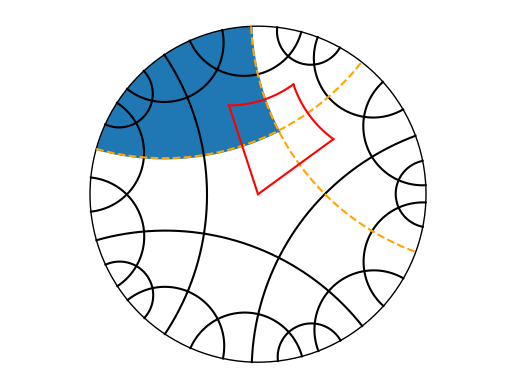

In [116]:
plt.axis('equal')
plt.axis('off')
for idx,g in enumerate(modl.geodesicList):
    if idx != 1 and idx != 0:
        geodesic(g.endpoints[0],g.endpoints[1],color = 'k',style = '-')
    
ax = plt.gca()
circle = plt.Circle((0, 0), 1,color = 'k', fill = False)
ax.add_patch(circle)
g1 = modl.geodesicList[0]
g2 = modl.geodesicList[1]
zs1 = geodesic(g1.endpoints[0],g1.endpoints[1],color = 'orange', style = '--')
zs2 = geodesic(g2.endpoints[0],g2.endpoints[1],color = 'orange', style = '--')
nfinal = 106
nfinal2 = 125
delta = nfinal2-nfinal+1
delta2 = 75
ax.fill_between(zs2.real[0:nfinal],zs2.imag[0:nfinal],np.sqrt(1-zs2.real[0:nfinal]*zs2.real[0:nfinal]),color = '#1f77b4', zorder = -10)
ax.fill_between(zs2.real[(nfinal-1):nfinal2],zs2.imag[(nfinal-1):nfinal2],[zs2.imag[nfinal2] for _ in range(delta) ], color = '#1f77b4',zorder = -10)
ax.fill_between(zs1.real[0:delta2],[zs2.imag[nfinal2] for _ in range(delta2) ],zs1.imag[0:delta2], color = '#1f77b4',zorder = -10)

centers = modl.centers
geodesic(centers[0],centers[1],color = 'r',style = '-')
geodesic(centers[0],centers[11],color = 'r',style = '-')
geodesic(centers[1],centers[12],color = 'r',style = '-')
geodesic(centers[11],centers[12],color = 'r',style = '-')

plt.savefig("./fig_ch_hypmodels_OneHypFracton.eps", format = 'eps', dpi = 1000,bbox_inches = 'tight',pad_inches = 0.03 )

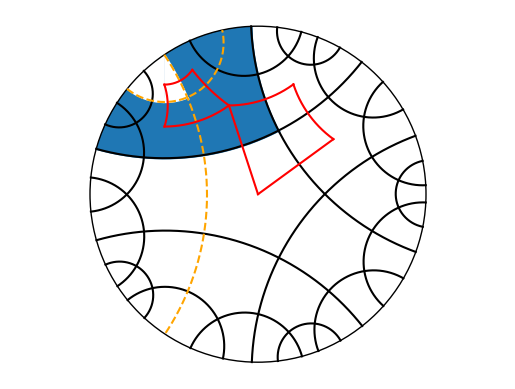

In [117]:
plt.figure(10)
plt.axis('equal')
plt.axis('off')

n1,n2,n3,n4 = 0,1,2,10
for idx,g in enumerate(modl.geodesicList):
    if idx != n1 and idx != n2 and idx !=n3 and idx!= n4:
        geodesic(g.endpoints[0],g.endpoints[1],color = 'k',style = '-')


ax = plt.gca()
circle = plt.Circle((0, 0), 1,color = 'k', fill = False)
ax.add_patch(circle)
g1 = modl.geodesicList[0]
g2 = modl.geodesicList[1]
g3 = modl.geodesicList[n3]
g4 = modl.geodesicList[n4]

zs1 = geodesic(g1.endpoints[0],g1.endpoints[1],color = 'k', style = '-')
zs2 = geodesic(g2.endpoints[0],g2.endpoints[1],color = 'k', style = '-')
zs3 = geodesic(g3.endpoints[0],g3.endpoints[1],color = 'orange', style = '--')
zs4 = geodesic(g4.endpoints[0],g4.endpoints[1],color = 'orange', style = '--')

nfinal = 106
nfinal2 = 125
delta = nfinal2-nfinal+1
delta2 = 75

ax.fill_between(zs2.real[0:nfinal],zs2.imag[0:nfinal],np.sqrt(1-zs2.real[0:nfinal]*zs2.real[0:nfinal]),color = '#1f77b4', zorder = -10)
ax.fill_between(zs2.real[(nfinal-1):nfinal2],zs2.imag[(nfinal-1):nfinal2],[zs2.imag[nfinal2] for _ in range(delta) ], color = '#1f77b4',zorder = -10)
ax.fill_between(zs1.real[0:delta2],[zs2.imag[nfinal2] for _ in range(delta2) ],zs1.imag[0:delta2], color = '#1f77b4',zorder = -10)

nfinal3 = 54
nfinal4 =  85
delta3 = nfinal4-nfinal3+1
delta4 = 35
ax.fill_between(zs4.real[0:nfinal3],zs4.imag[0:nfinal3],np.sqrt(1-zs4.real[0:nfinal3]*zs4.real[0:nfinal3]),color = 'w', zorder = -9)
ax.fill_between(zs4.real[(nfinal3-1):(nfinal4)],zs4.imag[(nfinal3-1):nfinal4],[zs4.imag[nfinal4] for _ in range(delta3)],color = 'w', zorder = -9)
ax.fill_between(zs3.real[:delta4],[zs4.imag[nfinal4] for _ in range(delta4)],zs3.imag[:delta4],color = 'w', zorder = -9)

centers = modl.centers
geodesic(centers[0],centers[1],color = 'r',style = '-')
geodesic(centers[0],centers[11],color = 'r',style = '-')
geodesic(centers[1],centers[12],color = 'r',style = '-')
geodesic(centers[11],centers[12],color = 'r',style = '-')

geodesic(centers[22],centers[11],color = 'r',style = '-')
geodesic(centers[22],centers[17],color = 'r',style = '-')
geodesic(centers[11],centers[15],color = 'r',style = '-')
geodesic(centers[17],centers[15],color = 'r',style = '-')



plt.savefig("./fig_ch_hypmodels_TwoHypFracton.eps", format = 'eps', dpi = 1000,bbox_inches = 'tight',pad_inches = 0.03 )